# Introduction

Go to `File` $\rightarrow$ `Save a copy in Drive` to save an editable version of this document in your own Google Drive.

# Additional Resources

If you need any help analyzing your data, please stop by the lab space the week of November 28th - December 1st during any of the usual lab times. Lab TFs will be available to answer any and all questions!

You may also contact your lab TF via email - they will typically respond within 24 hours. We are also happy to set up a Zoom time outside of the above office hours if needed.

* Tim: tmilbourne@g.harvard.edu
* Taylor: taylorcontreras@g.harvard.edu
* Abby: abigailcurtis@college.harvard.edu
* Ted: yufei_liu@fas.harvard.edu
* Furkan: sukrufurkanozturk@g.harvard.edu
* Sayalee: spatankar@college.harvard.edu

(Note that if you are asking about a Python error, please include the red error messages in your messages - this will help us diagnose any problems.)

# Define helper functions

Run the below cell to define a few functions from previous labs that may be helpful. Here's a list of these function:

*   `mycurvefit(function, XX, YY, UNCERT)` returns the best-fit values and uncertainties of fit function `function`, given measured data

  (`XX`, `YY` $\pm$ `UNCERT`)

* `get_pvalue(st)` returns the p-value corresponding to a significance test value (`st`)

* `compare_data_to_model_plot(measurements, theory, theory_err)` makes a histogram of measured values, stored in array `measurements`. Also plots a theoretical value with uncertainties (`theory` $\pm$ `theory_err`) for visual comparison

In [ ]:
#numpy for doing math
import numpy as np

#matplotlib for plotting
import matplotlib.pyplot as plt

#scipy for more 'science' functions, in this case curve fitting
from scipy.optimize import curve_fit
from scipy import stats


#we need the following package to allow colab to access files on our computer
from google.colab import files

def chisquare(data,model,uncertainty):
    '''
    Calculates value of chi squared for model given data and unvertainty

    Parameters
    ----------
    data : numpy array
            1D vector of data values

    model : numpy array
            1D vector of values predicted by model

    uncertainty : numpy array
            1D vector of uncertainty corresponding to data

    Returns
    -------
    x2 : float
       Returns value of chi squared for this model given data and uncertainty
    '''

    x2 = np.sum((data-model)**2/uncertainty**2)

    return x2


def mycurvefit(func,XX,YY,UNCERT,xlabel=None,ylabel=None,p0=None):
    '''
    Fits data (XX, YY, UNCERT) to function using scipy.curvefit, and then plots data and best fit
        Parameters
    ----------
    func : user-defined function
            Model to be used to fit data

    XX : numpy array
            1D vector of data's independent variable

    YY : numpy array
            1D vector of data's dependent variable

    UNCERT : numpy array
            1D vector of uncertainty in YY

    xlabel: string
            label for plot's x-axis

    ylabel : string
            label for plot's y-axis

    Returns
    -------
    fitparams : numpy array
           1D array of best fit values of parameters

    fiterrs : numpy array
            1D array of errors on best fit parameters (taken from sqrt of diag of covariance matrix)


    '''

    ##################################################
    #                Do the curve fit                #
    ##################################################


    # To get curve_fit to use UNCERT, set absolute_sigma = True.  Otherwise sigma = 1
    fitparams,pcov = curve_fit(func,XX,YY,sigma = UNCERT,absolute_sigma=True, p0=p0)

    # Find error in each parameter.  Assumes covariance matrix is roughly diagonal.
    fiterrs = np.sqrt(np.diag(pcov))

    # print out the parameters and errors on them
    print('Best Fit Parameters:\n')
    i = 0
    for A,sigA in zip(fitparams, fiterrs):
        i = i +1
        mystring = '\t P' + str(i) + ' = '
        print(mystring,round(A,5),'+/-',round(sigA,5))



    ##################################################
    #                Begin Plotting                  #
    ##################################################

    fig,ax = plt.subplots()
    # plot the raw data
    ax.errorbar(XX,YY,UNCERT,fmt='.',label='data')


    # plot the fit
    XX_shade = np.linspace(min(XX),max(XX),100)
    ax.plot(XX_shade,func(XX_shade,*fitparams),label = 'best fit')

    if xlabel == None:
      xlabel = ''
    if ylabel == None:
      ylabel = ''

    # make the plot nice
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.legend()



    ##################################################
    #    Calculate and display the fit metrics       #
    ##################################################

    # calculate the number of degrees of freedom
    shape = np.shape(XX)
    dof = shape[0] - len(fitparams)

    print('\n Fit Metrics:\n')
    print('\t Degrees of freedom (N-d): ', dof)

    X2 = chisquare(YY,func(XX,*fitparams),UNCERT)
    #X2string = '\t Chi Squared = ' + str(round(X2,1))
    X2redstring = '\t Reduced Chi Squared = '+ str(round(X2/dof,3))
    #print(X2string)
    print(X2redstring)


    return fitparams,fiterrs

#to calculate a 2-tailed p-value from a s.s. value call the function pvalue_1tailed (whose input is an s.s. value)
def get_pvalue(ss_value):
    #print('p-value:', stats.norm.sf(abs(ss_value)))
    return 2*stats.norm.sf(abs(ss_value))

def gaussian_profile(x, mean, std):
  return 1/np.sqrt(2*np.pi*std**2)*np.exp(-1/2*(x-mean)**2/std**2)

def compare_data_to_model_plot(measurements, theory, theory_err):

  fig, ax = plt.subplots()
  ax.hist(measurements, density = True, color='blue', alpha = 0.5, label = 'data')
  ylimits = ax.get_ylim()
  #ax.vlines(theory, *ylimits, 'r', linestyle='--', label = 'prediction')
  #ax.axvspan(theory - theory_err, theory + theory_err, color='red', alpha= 0.5)

  ax.errorbar(theory,gaussian_profile(measurements.mean(), measurements.mean(), measurements.std()),
              xerr =theory_err, markersize = 16, fmt = '.r', capsize=8,
              label = 'prediction')


  ax.set_ylim(*ylimits)

  xlimits =ax.get_xlim()
  xplot = np.linspace(*xlimits)
  gaus_meas = gaussian_profile(xplot, measurements.mean(), measurements.std())
  ax.plot(xplot, gaus_meas, '--k', alpha=0.75, label = 'distribution of data')
  ax.errorbar(measurements.mean(), gaus_meas.max(), xerr = measurements.std()/np.sqrt(len(measurements)), markersize = 16, fmt = '.k', capsize=8)

  ax.set_xlim(*xlimits)

  ax.legend()
  return

#Research question

what is your research question? Do you have an expectations about what the answer will be? Explain your hypothesis below:

>> Our research question is as follows: does the surface area of a falling piece of cardboard affect the time it takes the cardboard to fall from a known height?

>> We hypothesize that as the surface area of the carboard increases, the time it takes for the cardboard to fall to the ground will also increase.

#Experimental design

What data will you take? How will you measure it? What sets your experimental unceretainties? Explain below.

>> To investigate our hypothesis, we will measure the time it takes for pieces of carboard with different surface areas to fall to the ground when dropped from the same hight. We will take this time measurement with stopwatches on our phones. We will measure the time it takes for two pieces of carboard with different surface areas to fall. For each piece of carboard, we will measure the time it takes for the carboard to fall five times. For each piece of carboard, we will then calculate the average time it takes for the piece to fall and the standard error from the mean for the piece. With these data, we will then calculate whether there is a statstically significant difference between the time it takes each piece to fall. There are multiple potential souces of uncertainty in our experiment. One source of error is that the stop watch we are using is only preciese to the 10th milisecond. Another source of error is that one person is droping the cardboard and another person is timing the fall of the cardboard, potentially leading to uncertainty over when the carboard starts falling. An additional source of error is that a human is measuring the time it takes for the cardboard to fall, which leads to general uncertainty given differing reaction times.

#Record data
We recorded our data in the below numpy arrays.


In [ ]:
# data from big piece of cardboard and small piece
big_data = np.array([1.39,1.55,1.70,1.50,1.38])
small_data = np.array([1.19,1.25,1.22,1.33,1.26])

big_area = 21 * 19
small_area = 7 * 6.5
print("Big area: ", big_area, " cm^2\nSmall area: ", small_area, " cm^2")

Big area:  399  cm^2
Small area:  45.5  cm^2


In [ ]:
#calculate means
mean_big_data = np.mean(big_data)
mean_small_data = np.mean(small_data)
print("Big data mean: ", mean_big_data, "\nSmall data mean: ", mean_small_data)

# calculate standard errors
big_se = np.std(big_data) / np.sqrt(len(big_data))
small_se = np.std(small_data) / np.sqrt(len(small_data))
print("Big data S.E.: ", big_se, "\nSmall data S.E.: ", small_se)

Big data mean:  1.504 
Small data mean:  1.25
Big data S.E.:  0.052505237833953305 
Small data S.E.:  0.02097617696340305


# Analyze your data

In [ ]:
# Significance test
st = abs(mean_big_data - mean_small_data) / np.sqrt((big_se)**2 + (small_se)**2)
print("Significance test value: ", st)

Significance test value:  4.492374809767259


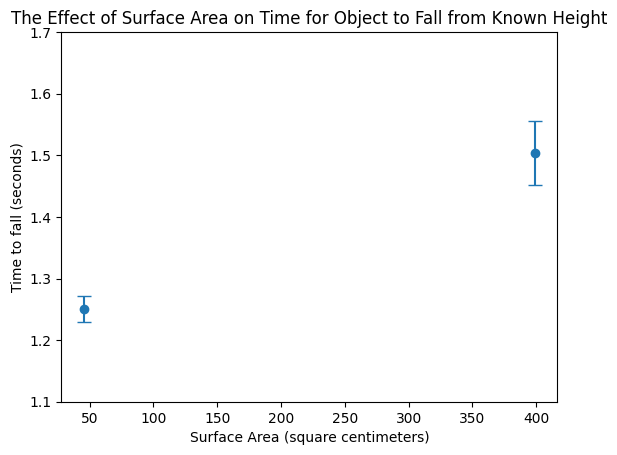

In [ ]:
import matplotlib.pyplot as plt
means = [mean_big_data,mean_small_data]
sterrors = [big_se, small_se]
positions = [big_area, small_area]

plt.errorbar(positions,means,yerr=sterrors, fmt='o', capsize=5)

plt.title("The Effect of Surface Area on Time for Object to Fall from Known Height")
plt.xlabel("Surface Area (square centimeters)")
plt.ylabel("Time to fall (seconds)")
plt.ylim([1.1, 1.7])

plt.show()

Explanation of analysis:
>> We collected data from our experiment and formatted it into two main parts: big and small data (for the big and small pieces of cardboard, respectively). We calculated the mean values of the data we collected, which gave us the average time it took for the objects to fall. Based on these data, we then calculated the standard deviation and standard error for both pieces of carboard. Using the standard errors, we were able to create a scatterplot with error bars, where the error bars are equivalent to the calculated standard error of the mean. We calculated that the average time for the big piece of cardboard to fall was 1.504 +- 0.053 seconds while the time for the small piece of cardboard was 1.25 +- 0.021 seconds. We performed a significance test that yielded a s.t. value of 4.49.

---

# Draw conclusions

>>  We calculated a significance test value of 4.49 which is greater than the signifcance threshold value 2, indicating there is more than two error bars between the means we calculated. Furthermore, in our scatterplot, we observe that there is no overlap between the error bars. Taking these results together, we can conclude that there is a statistically significant difference between the time taken for the two pieces of cardboard to fall. This supports our hypothesis that as surface area increases, the time it takes the cardboard to fall also increases because the large piece of cardboard took a statistically significant longer time to fall than the small piece of cardboard..
>>It’s important to take the systematic error into account when doing measurements like we did in this lab. The systematic error in these measurements affects the results we obtained in the significance test through our analysis. The systematic errors we have are specifically: the misalignment error between the person letting go of the pieces of cardboard and the initiation of the stopwatch; the accuracy of the person in control of the stopwatch to stop the clock when the cardboard hit the ground; the precision of the cutout giving the smoothness of the carboard affecting the way in which the cardboard is falling; the precision of the stopwatch
>> To address these sources of systemic error, if provided the opportunity to redo this experiment, we would use sensors connected to the drop to increase the accuracy of the experiment. Thus, there would be greater synchronization between the release of the carboard and the start of the timer and the collision of the cardboard with the ground and the end of the timer. Although these changes would make the data we measured more accurate and thus affect the mean and standard error values we calculated, they likely would not affect our overall finding of significance in the difference of the time taken for the small and large pieces of cardboard to fall.